In [70]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Activation
from tensorflow.keras.models import Model

In [71]:
input_img = Input(shape=(224, 224, 3))
x = Conv2D(16, (3, 3), padding='same', activation='relu')(input_img)
x = MaxPooling2D(pool_size=(2,2), padding='same')(x)
x = Conv2D(1,(3, 3), padding='same', activation='relu')(x)
encoded = MaxPooling2D(pool_size=(2,2), padding='same')(x)

In [74]:
x = Conv2D(1,(3, 3), padding='same', activation='relu')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16,(3, 3), padding='same', activation='relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(3,(3, 3), padding='same')(x)
decoded = Activation('linear')(x)

In [75]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')
autoencoder.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 112, 112, 1)       145       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 56, 56, 1)         0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 56, 56, 1)         10        
_________________________________________________________________
up_sampling2d_34 (UpSampling (None, 112, 112, 1)       0  

In [76]:
encoder = Model(inputs = input_img, outputs = encoded)

In [77]:
import glob
import pandas as pd
from tensorflow.keras.preprocessing import image
import numpy as np

In [78]:
RUN_NAME = '190719_Hela_Ecoli_1to1_01'
EXPERIMENT_DIR = '/Users/darylwilding-mcbride/Downloads/experiments/dwm-test'
ENCODED_FEATURE_SLICES_DIR = '{}/encoded-features/{}/slices'.format(EXPERIMENT_DIR, RUN_NAME)
ENCODED_FEATURES_DIR = '{}/encoded-features/{}'.format(EXPERIMENT_DIR, RUN_NAME)

In [79]:
feature_slices_l = glob.glob("{}/feature-*-slice-*.png".format(ENCODED_FEATURE_SLICES_DIR))
image_arrays_l = []
for feature_slice in sorted(feature_slices_l):
    # load the image and generate the feature vector
    img = image.load_img(feature_slice, target_size=(224, 224))
    x = image.img_to_array(img)
    image_arrays_l.append(x)

In [84]:
image_arrays = np.array(image_arrays_l)

In [85]:
image_arrays.shape

(4985, 224, 224, 3)

In [86]:
image_arrays = image_arrays.astype('float32') / 255.

In [96]:
image_arrays.shape

(4985, 224, 224, 3)

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, _, _ = train_test_split(X_train, X_train, test_size=0.20)

In [100]:
autoencoder.fit(X_train, X_train, epochs = 15, batch_size = 64, validation_split = 0.1)

Epoch 1/15
38/38 [==============================] - 59s 2s/step - loss: 0.0035 - val_loss: 0.0036
Epoch 2/15
38/38 [==============================] - 59s 2s/step - loss: 0.0035 - val_loss: 0.0036
Epoch 3/15
38/38 [==============================] - 58s 2s/step - loss: 0.0035 - val_loss: 0.0036
Epoch 4/15
38/38 [==============================] - 58s 2s/step - loss: 0.0035 - val_loss: 0.0036
Epoch 5/15
38/38 [==============================] - 60s 2s/step - loss: 0.0035 - val_loss: 0.0036
Epoch 6/15
38/38 [==============================] - 60s 2s/step - loss: 0.0035 - val_loss: 0.0036
Epoch 7/15
38/38 [==============================] - 60s 2s/step - loss: 0.0035 - val_loss: 0.0036
Epoch 8/15
38/38 [==============================] - 59s 2s/step - loss: 0.0034 - val_loss: 0.0036
Epoch 9/15
38/38 [==============================] - 60s 2s/step - loss: 0.0034 - val_loss: 0.0036
Epoch 10/15
38/38 [==============================] - 60s 2s/step - loss: 0.0034 - val_loss: 0.0036
Epoch 11/15
38/38 [

In [101]:
encoder = Model(inputs = input_img, outputs = encoded)

In [102]:
encoded_imgs = encoder.predict(X_test)

In [103]:
decoded_imgs = autoencoder.predict(X_test)

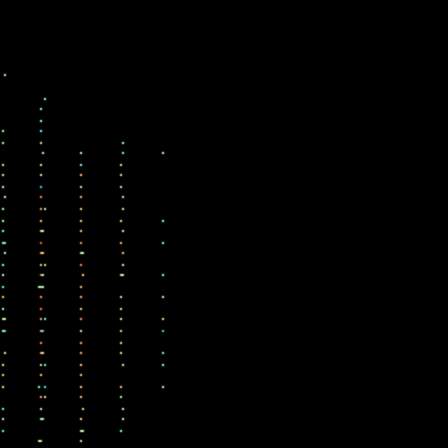

In [112]:
image.array_to_img(X_test[1]).resize((448,448))

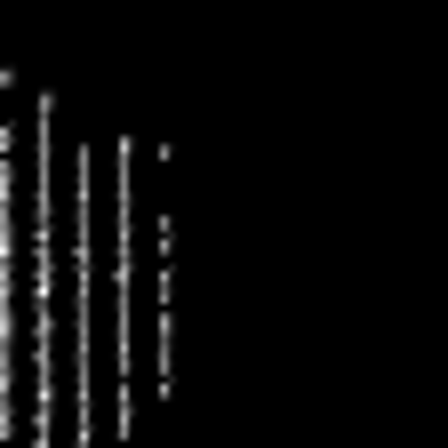

In [113]:
image.array_to_img(encoded_imgs[1]).resize((448,448))

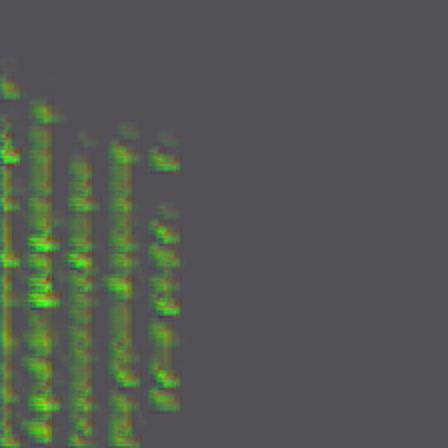

In [114]:
image.array_to_img(decoded_imgs[1]).resize((448,448))